# Objectives 
1. Main object-oriented interface
2. Basic plots: 
 - 2.1 Small multiples
 - 2.2 Twin plots
3. Plot time-series 
4. Quantitative variables comparison
 - 4.1 Bar charts
 - 4.2 Histograms
5. Adding error-bars
6. Staistical chart: Boxplots
7. Relational chart: Scatterplots
8. Final polish of plots
 - 8.1 Set style
 - 8.2 Saving a figure and automate your visualization

## 1. Main object-oriented interface

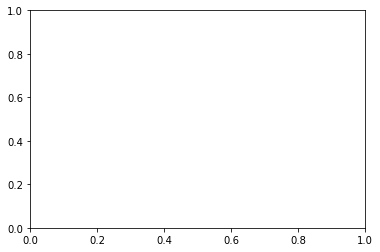

In [1]:
# object-oriented interfact 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.show()

## 2. Basic plots

In [ ]:
# plotting method of the axes object
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Call the show function
plt.show()

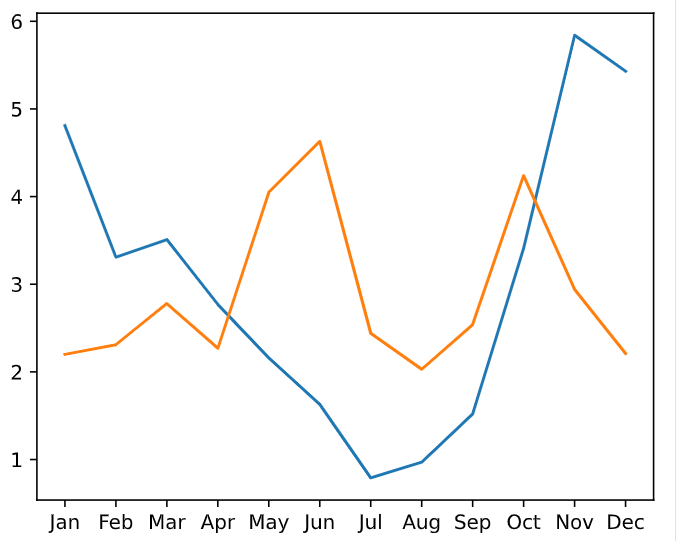

In [ ]:
# customizing the plots
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], marker = 'o', color ='b',linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], marker='v', color='r',linestyle ='--')

# Customize the x-axis label
ax.set_xlabel('Time (months)')

# Customize the y-axis label
ax.set_ylabel('Precipitation (inches)')

# Add the title
ax.set_title('Weather patterns in Austin and Seattle')

# Call show to display the resulting plot
plt.show()

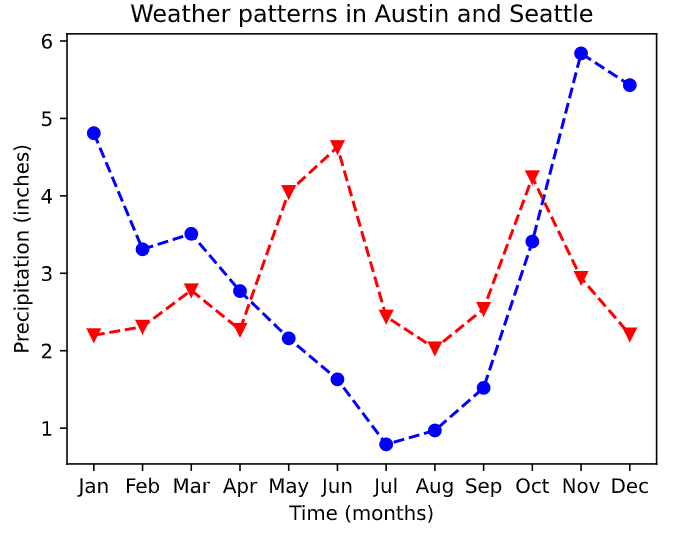

### 2.1 Small multiples
*fig, ax = plt.subplots()*

In [ ]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-NORMAL"], color = 'b')
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-25PCTL"], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-75PCTL"], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-NORMAL"], color = 'r')
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-25PCTL"], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-75PCTL"], color = 'r', linestyle = '--')

plt.show()

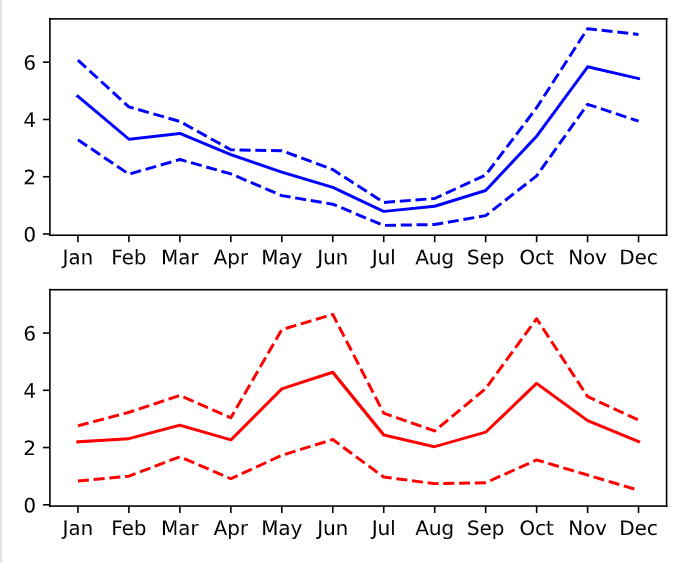

### 2.2 Using twin axes

In [ ]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig,ax=plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()

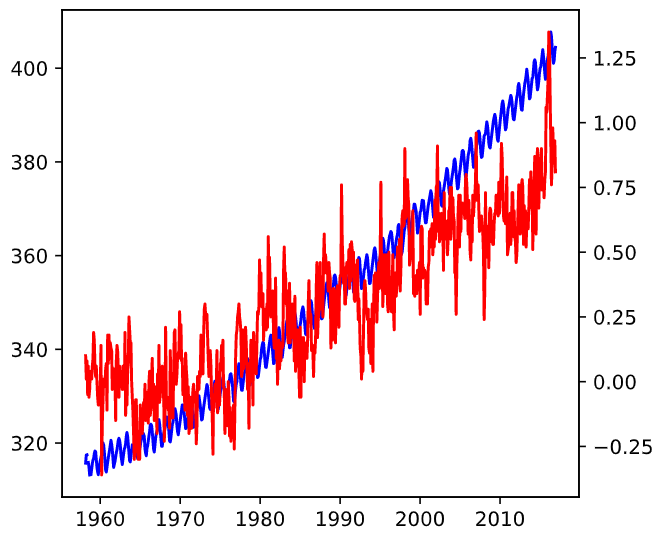

In [ ]:
# Define a function that plots two time-series data

# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)','CO2 levels')

ax2 = ax.twinx()

plot_timeseries(ax2,climate_change.index,climate_change['relative_temp'],'red','Time (years)', 'Relative temp (Celsius)')

ax2.annotate('>1 degree',xy = (pd.Timestamp('2015-10-06'),1),xytext = (pd.Timestamp('2008-10-06'),-0.2),arrowprops = { 'arrowstyle':'->' ,'color':'gray'})

plt.show()

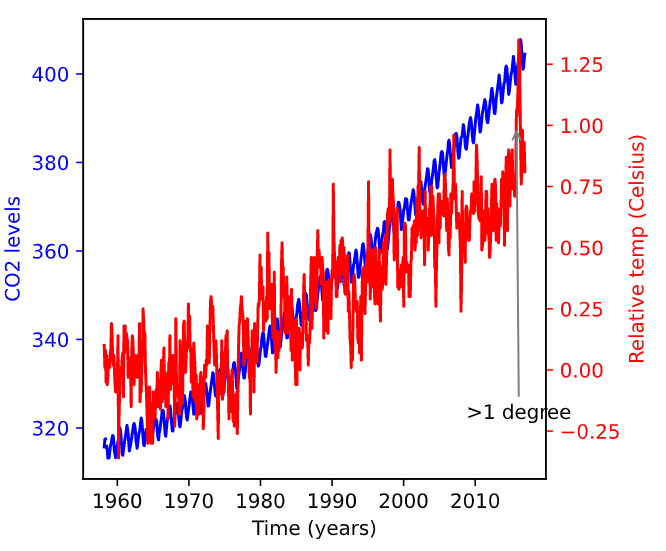

## 3. Plotting time-series data
*Matplotlib can know the times as x-axis automatically*

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index,climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

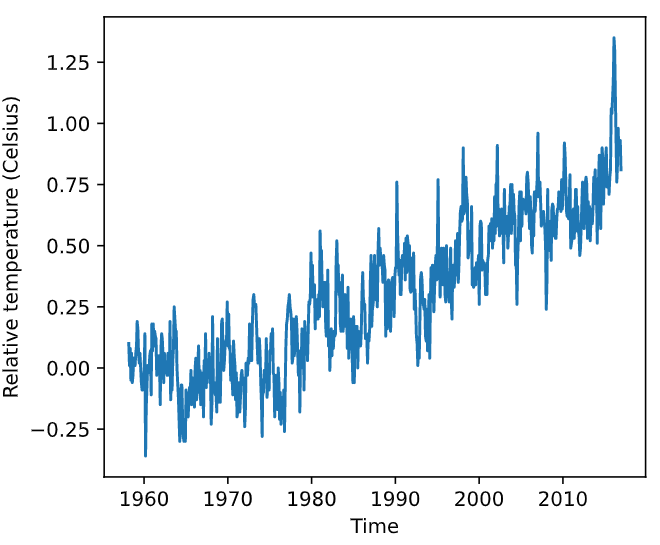

**Using a time index to zoom in**

In [ ]:
# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01" : "1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

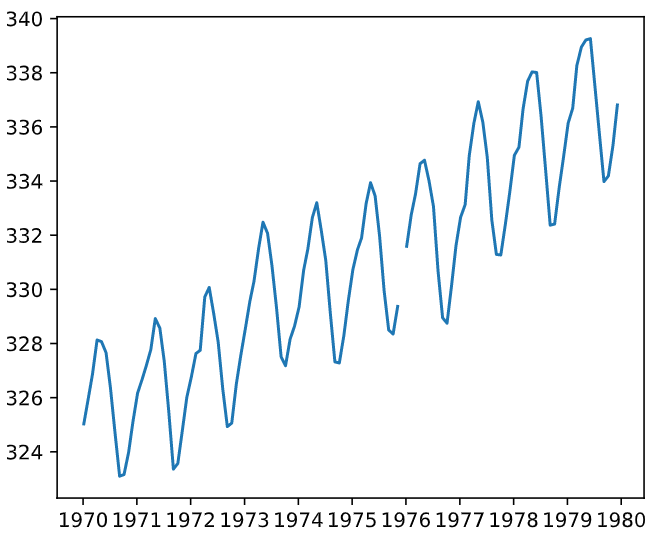

## 4. Quantitative variables comparison

### 4.1 : Bar chart

In [ ]:
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index,medals['Bronze'],bottom=medals['Gold']+medals['Silver'],label='Bronze')

# Display the legend
ax.legend()

plt.show()

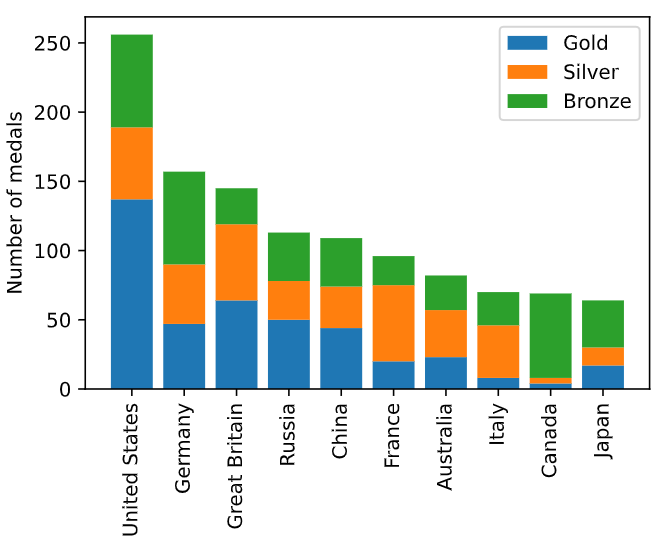

### 4.2 Histograms

In [ ]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'],label='Rowing',histtype='step',bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'],label='Gymnastics',histtype='step',bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

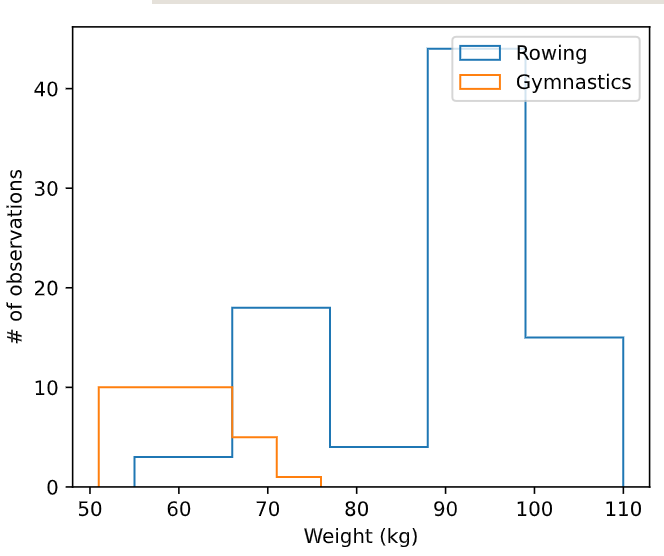

## 5. Adding error-bars

**Adding error-bars to bar chart**

In [ ]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar('Gymnastics',mens_gymnastics['Height'].mean(),yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel('Height (cm)')

plt.show()

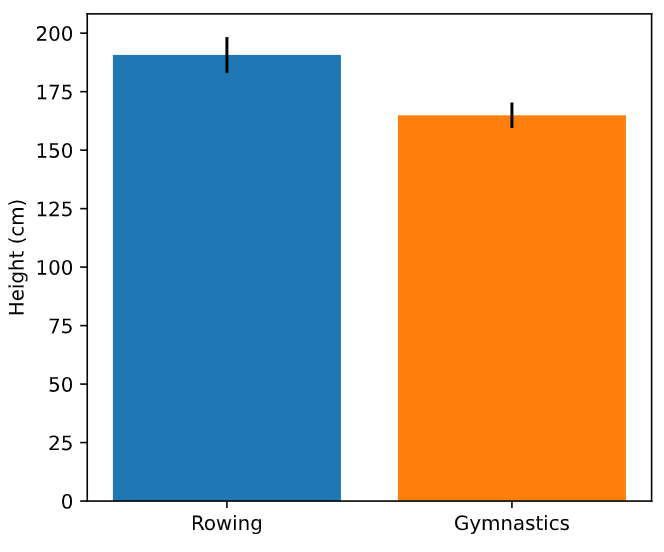

**Adding error-bars to a plot**

In [ ]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'],austin_weather['MLY-TAVG-NORMAL'],austin_weather['MLY-TAVG-STDDEV'])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

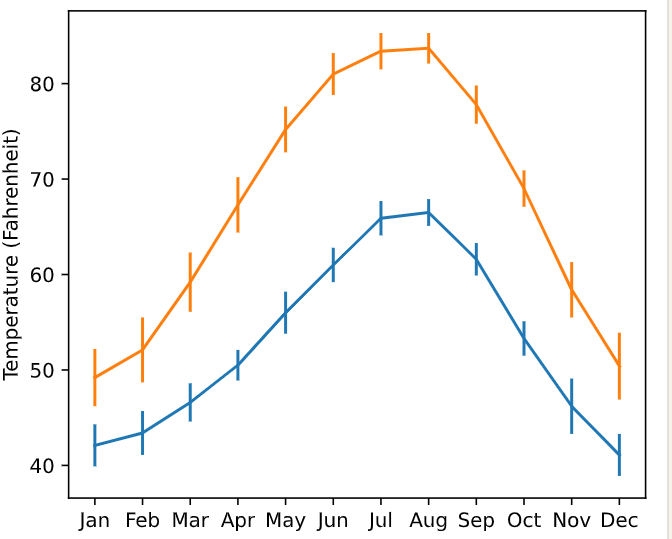

## 6. Statistical chart: boxplot

In [ ]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'],mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing','Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

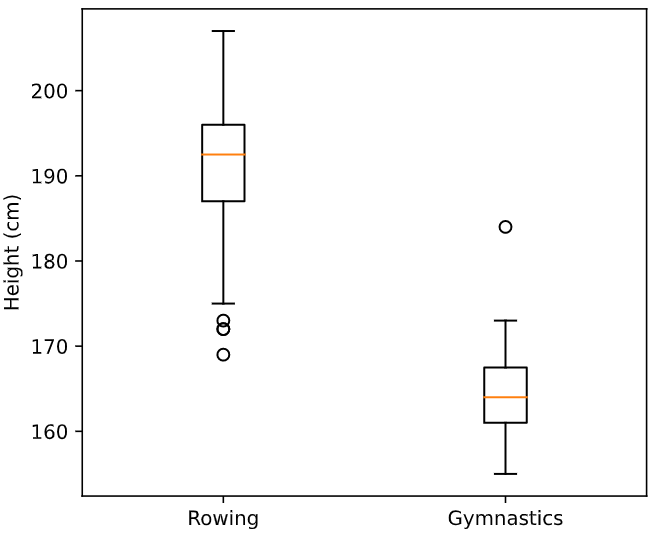

## 7. Relational chart: scatterplot

**Scatterplot with encoding time by color**

In [ ]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'],climate_change['relative_temp'],c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

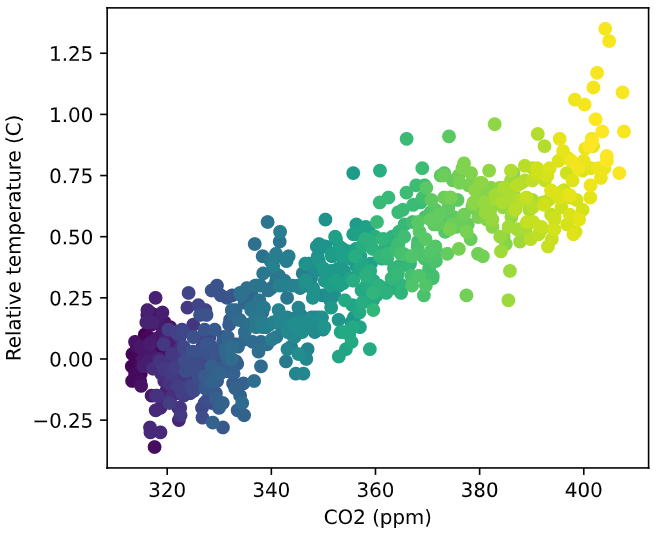

## 8. Final finish of plots

### 8.1 Set style 

In [ ]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use("ggplot")
fig,ax=plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

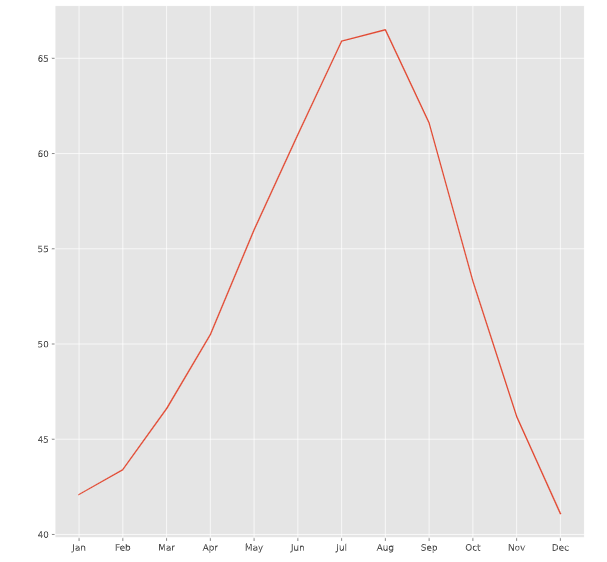

### 8.2 Saving a figure and automate your visualization

In [ ]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([3,5])
fig.savefig('figure_3_5.png')

In [ ]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport']==sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport,sport_df['Weight'].mean(),yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig('sports_weights.png')

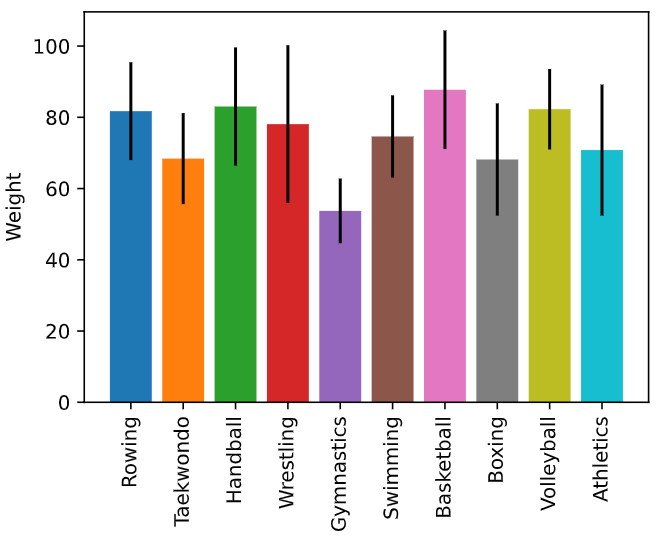